In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# Importing standard ML set - numpy, pandas, matplotlib
import os
import time
import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Importing scikit-learn tools
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from PIL import Image



from keras import models, layers
import numpy as np
from keras.utils import to_categorical
import pandas as pd
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Dense, Lambda
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [0]:
cars = ['Alfa Romeo', 'Audi', 'BMW', 'Chevrolet', 'Citroen', 'Dacia','Ferrari']

In [3]:
# Setting up the image pool
image_path = '/content/drive/My Drive/Projects/Image_classification/car_images/'
imgs = os.listdir(image_path)
img_x = img_y = 50 # image size is constant
n_samples = np.size(imgs)
n_samples

267

In [5]:
# Loading all images...
images = np.array([np.array(Image.open(image_path + img).convert("RGB")).flatten() for img in os.listdir(image_path)], order='F', dtype='uint8')
np.shape(images)

(267, 7500)

In [6]:
# an example image
images[1][1:]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [7]:
# Producing labels and assigning them accordingly
labels = np.array([cars.index(re.match(r"(^\D+)", imgs[i])[0]) for i in range(n_samples)])
labels.shape

(267,)

In [0]:
# Some additional data preparation needs to be done before blasting the images into the neural net
dataset, labelset = shuffle(images, labels, random_state=42) # 42, what else? ;)
train_data = [dataset, labelset]

(267, 7500) (267,)


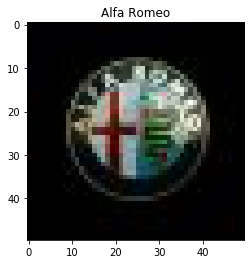

In [10]:
r = 30
print(train_data[0].shape, train_data[1].shape)
plt.imshow(images[r].reshape(img_x, img_y, 3))
plt.title(cars[labels[r]])
plt.show()

In [0]:


# We have to prepare the dataset to fit into the CNN
X_train, X_test, y_train, y_test = train_test_split(train_data[0], train_data[1], test_size=0.2)

# we will maintain a copy of the test set, as we will do a couple of transformation to it
X_test_img = X_test.copy()

# let's bring back the images, like above
X_train = X_train.reshape(X_train.shape[0], img_x, img_y, 3)
X_test = X_test.reshape(X_test.shape[0], img_x, img_y, 3)

# Now for some convergence-friendly procedure (is supposed to converge a lot faster when brought to 0-1 float)...
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# ...and some additional pre-processing, to zero-center the data...
X_train = np.subtract(X_train, 0.5)
X_test = np.subtract(X_test, 0.5)

# ...and to scale it to (-1, 1)
X_train = np.multiply(X_train, 2.0)
X_test = np.multiply(X_test, 2.0)

# Labels have to be transformed to categorical
Y_train = np_utils.to_categorical(y_train, num_classes=len(cars))
Y_test = np_utils.to_categorical(y_test, num_classes=len(cars))



In [12]:
X_train.shape, X_test.shape
X_train.shape, X_test.shape

((213, 50, 50, 3), (54, 50, 50, 3))

In [0]:
def cnn():
    model = models.Sequential()

    model.add(Convolution2D(32,(3,3), activation = 'relu'))
    model.add(BatchNormalization(axis=1))   
    model.add(Convolution2D(64,(3,3), activation = 'relu'))
    model.add(MaxPooling2D())
    model.add(Convolution2D(128,(3,3), activation = 'relu'))
    model.add(BatchNormalization(axis=1))
    model.add(Convolution2D(128,(2,2), activation = 'relu'))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(len(cars), activation='softmax'))          
    model.compile(optimizer='adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model   

In [39]:
classifier = cnn()
classifier.fit(X_train, Y_train, epochs=30,batch_size=120,validation_data=(X_test, Y_test))

Train on 213 samples, validate on 54 samples
Epoch 1/30
213/213 [==============================] - 3s 14ms/step - loss: 4.3304 - acc: 0.1831 - val_loss: 2.6267 - val_acc: 0.0926
Epoch 2/30
213/213 [==============================] - 0s 291us/step - loss: 2.8229 - acc: 0.1972 - val_loss: 1.8559 - val_acc: 0.2963
Epoch 3/30
213/213 [==============================] - 0s 267us/step - loss: 1.9291 - acc: 0.2207 - val_loss: 1.8801 - val_acc: 0.2963
Epoch 4/30
213/213 [==============================] - 0s 263us/step - loss: 1.9218 - acc: 0.2066 - val_loss: 1.8981 - val_acc: 0.2407
Epoch 5/30
213/213 [==============================] - 0s 271us/step - loss: 1.8749 - acc: 0.2723 - val_loss: 1.8819 - val_acc: 0.2222
Epoch 6/30
213/213 [==============================] - 0s 255us/step - loss: 1.8477 - acc: 0.2958 - val_loss: 1.9156 - val_acc: 0.2222
Epoch 7/30
213/213 [==============================] - 0s 248us/step - loss: 1.8143 - acc: 0.2723 - val_loss: 1.8886 - val_acc: 0.2222
Epoch 8/30
213/213

In [40]:
scores = classifier.evaluate(X_test, Y_test) # let's look at the accuracy on the test set
print("Accuracy test: %.2f%%" % (scores[1]*100))

54/54 [==============================] - 0s 291us/step
Accuracy test: 77.78%
